In [1]:
"""
Notebook to (re-) plot generated option prices
"""
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['grid.linewidth'] = 0.1
plt.rcParams['grid.color'] = "lightgray"
lwidth = 1

data_path = 'C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\Neural-Network-Option-Pricing-Master-Thesis\\Code\\OptionData\\'
plot_path = 'C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\'

# 1 One-dim Generated Prices

In [2]:
T = [0.3, 1, 1.3]

In [3]:
df_merton = pd.read_csv(data_path + 'one_dim_merton_prices.csv')
df_merton.columns = T + ['s']
df_nig = pd.read_csv(data_path + 'one_dim_nig_prices.csv')
df_nig.columns = T + ['s']

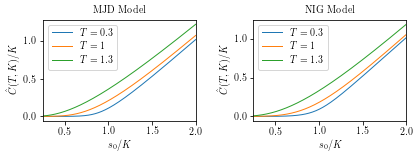

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(6,2.3))
fig.tight_layout()
for ax, df, name in zip(axes, [df_merton, df_nig], ['MJD', 'NIG']):
    ax.margins(x=0)
    for t in T:
        ax.plot(df['s'], df[t], label='$T={}$'.format(t), lw=lwidth)
    ax.set_title('{} Model'.format(name), fontsize=10)
    ax.set_xlabel('$s_0/K$', fontsize=10)
    ax.set_ylabel('$\hat{C}(T,K)/K$', fontsize=10)
    ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig(plot_path + 'one_dim_prices_gen.pdf')

# 2 Two-dim Generated Prices

In [5]:
df_merton = pd.read_csv(data_path + '2_dim_merton_prices.csv')
df_merton.columns = T + ['s1', 's2']
df_nig = pd.read_csv(data_path + '2_dim_nig_prices.csv')
df_nig.columns = T + ['s1', 's2']

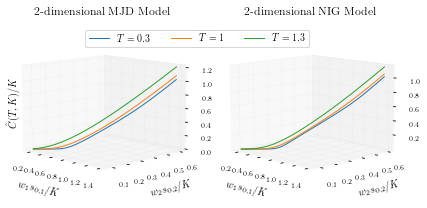

In [6]:
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
fig.tight_layout()
x = df_merton['s1']
y = df_merton['s2']
for ax, df, name in zip([ax1, ax2], [df_merton, df_nig], ['MJD', 'NIG']):
    for t in T:
        ax.plot(x, y, df[t], label='$T={}$'.format(t), lw=lwidth)
    ax.set_xlabel('$w_1s_{0,1}/K$', fontsize=10)
    ax.set_ylabel('$w_2s_{0,2}/K$', fontsize=10)
    ax.w_xaxis.line.set_color("white")
    ax.w_yaxis.line.set_color("white")
    ax.w_zaxis.line.set_color("white")
    ax.view_init(10, -45)
    ax.set_title('$2$-dimensional {} Model'.format(name))
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.tick_params(axis='both', which='minor', labelsize=7)
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc=[0.2,0.77], ncol=3)
fig.text(0.04, 0.5, '$\hat{C}(T,K)/K$', va='center', rotation='vertical', fontsize=10)
plt.tight_layout()
plt.savefig(plot_path + 'two_dim_prices_gen.pdf')
plt.show()

# 3 AMZN Prices

In [7]:
asof = date(2022, 3, 15) # date of obtained close prices
s0 = 2947.33
maturities = [date(2022, 7, 15), date(2023, 3, 17), date(2024, 1, 19)]

T = {}
for d in maturities:
    T[np.round((d - asof).days / 365, 2)] = d
    
s = {}
prices = {}

for t in T:
    df = pd.read_csv(data_path + 'amzn-options-exp-{}-monthly-show-all-stacked-03-16-2022.csv'.format(T[t]))
    df = df[df['Type'] == 'Call']
    df['Strike'] = df['Strike'].apply(lambda x: float(x.replace(',', '')))
    df['Midpoint'] = df['Midpoint'].apply(lambda x: float(x.replace(',', '')))
    df = df[['Strike', 'Midpoint']]
    df['Option Norm'] = df['Midpoint'] / df['Strike']
    df['Stock Norm'] = s0 / df['Strike']
    s[t] = np.array(df['Stock Norm']).reshape((len(df), 1))
    prices[t] = np.array([df['Option Norm']]).reshape((len(df), 1))

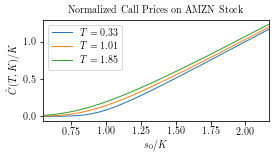

In [8]:
fig = plt.figure(figsize=(4, 2.3))
ax = fig.add_subplot()
fig.tight_layout()
ax.margins(x=0)
for t in T:
    ax.plot(s[t], prices[t], label='$T={}$'.format(t), lw=lwidth)
ax.set_xlabel('$s_0/K$', fontsize=10)
ax.set_ylabel('$\hat{C}(T,K)/K$', fontsize=10)
ax.set_title('Normalized Call Prices on AMZN Stock', fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()
plt.savefig(plot_path + 'one_dim_prices_amzn.pdf')

# 4 Thirty-dim Generated Prices

In [9]:
T = [0.3, 1, 3]

df_merton = pd.read_csv(data_path + '30_dim_merton_prices.csv')
df_merton.columns = T + ['s' + str(i) for i in range(1, 31)]
df_nig = pd.read_csv(data_path + '30_dim_nig_prices.csv')
df_nig.columns = T + ['s' + str(i) for i in range(1, 31)]

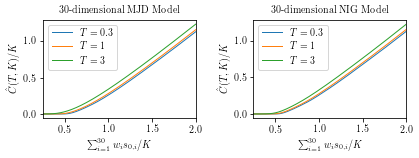

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(6,2.3))
fig.tight_layout()
for ax, df, name in zip(axes, [df_merton, df_nig], ['MJD', 'NIG']):
    ax.margins(x=0)
    for t in T:
        basket_value = df.drop(T, axis=1).sum(axis=1)
        ax.plot(basket_value, df[t], label='$T={}$'.format(t), lw=lwidth)
    ax.set_title('$30$-dimensional {} Model'.format(name), fontsize=10)
    ax.set_xlabel('$\sum_{i=1}^{30} w_i s_{0,i}/K$', fontsize=10)
    ax.set_ylabel('$\hat{C}(T,K)/K$', fontsize=10)
    ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig(plot_path + 'thirty_dim_prices_gen.pdf')

In [12]:
from math import floor
n_weights=
x = 5/21 * (np.sqrt(21 * n_weights + 6540) - 81)
list(map(floor, [x, 3/5 * x, 2/5 * x]))

[2, 1, 1]